## **Multi Layer Perceptrons (MLP)**
Objective: create  neural networks (i.e., Multilayer perceptrons) for simple regression/classification tasks with Keras
Refer: https://keras.io/about/

### MLP Structure


*   Each MLP model is consisted of one input layer, several hidden layers, and one output layer
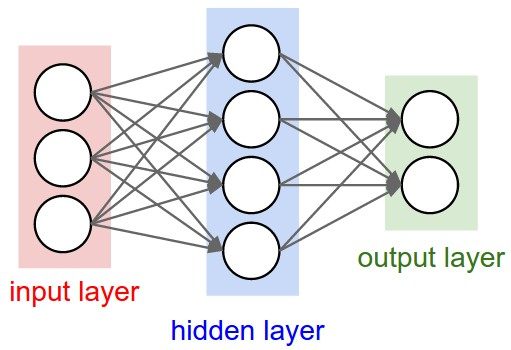



*   Number of input neurons: 3
*   Number of hidden neurons: 4
*   Number of output neurons: 2
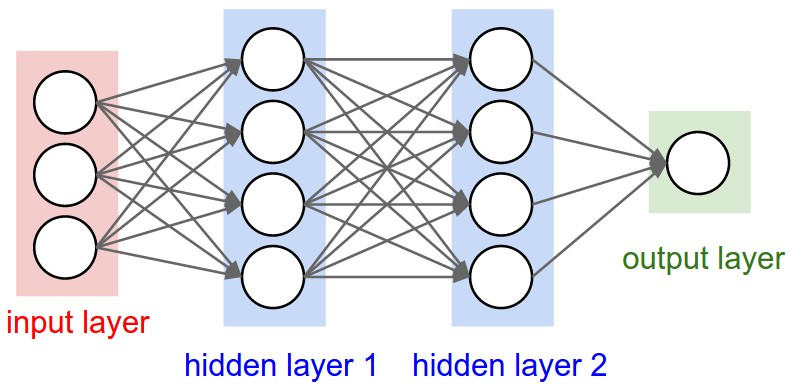

## MLP for Regression tasks
* When the target (y) is continuous (real)
* For loss function and evaluation metric, mean squared error (MSE) is commonly used

In [ ]:
#Import dataset from the Keras Library and load data
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()


65536/57026 [==================================] - 0s 0us/step


## Model Creation: Work Flow


*   Prepare data
*   Split data
*   Create model
*  Compile the model
*  Fit the model
* Predict result for unknown value
* Evaluate the model 
* Freeze Modify or choose a new algorithm



## Dataset Description


*   Boston housing dataset has total 506 data instances (404 training & 102 test)
* 13 attributes (features) to predict "the median values of the houses at a location"

This is a dataset taken from the StatLib library which is maintained at Carnegie Mellon University.

Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).

Refer: https://keras.io/api/datasets/boston_housing/ 



**1,2) Dataset Preparation**

In [ ]:
#Display the dataset shape
print("Train shape",X_train.shape)
print("Test shape",X_test.shape)
print(y_train.shape)
print(y_test.shape)

Train shape (404, 13)
Test shape (102, 13)
(404,)
(102,)


### **3) Model Creation**

In [ ]:
from tensorflow.keras.models import Sequential
model=Sequential()

**3-1. Adding layers**


*   Keras layers can be added to the model
*    Adding layers are like stacking lego blocks one by one
Refer: https://keras.io/api/layers/core_layers/



In [ ]:
from tensorflow.keras.layers import Activation, Dense

In [ ]:
from tensorflow.keras.layers import Activation, Dense
# Keras model with two hidden layer with 10 neurons each 
model.add(Dense(10, input_shape = (13,)))    # Input layer => input_shape should be explicitly designated
model.add(Activation('sigmoid'))
model.add(Dense(10))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(10))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(1))                          # Output layer => output dimension = 1 since it is regression problem

In [ ]:
# This is equivalent to the above code block
model.add(Dense(10, input_shape = (13,), activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


 **param_number = output_neurons * (input_neurons+ 1)**

**3-2 Model compile**

* Keras model should be "compiled" prior to training
* Types of loss (function) and optimizer should be designated

Refer: 
 (optimizers): https://keras.io/optimizers/
 
  (losses): https://keras.io/losses/


In [ ]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mse'])    # for regression problems, mean squared error (MSE) is often employed



**4-Training** 

In [ ]:
history=model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)


Epoch 1/100
9/9 [==============================] - 1s 1ms/step - loss: 354.7178 - mse: 354.7178
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 100.3136 - mse: 100.3136
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 84.6613 - mse: 84.6613
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 87.3857 - mse: 87.3857
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 84.8873 - mse: 84.8873
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 84.8238 - mse: 84.8238
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 85.0129 - mse: 85.0129
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 84.4711 - mse: 84.4711
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 84.1917 - mse: 84.1917
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 84.1206 - mse: 84.1206
Epoch 11/100
9/9 [==============================] - 0s 

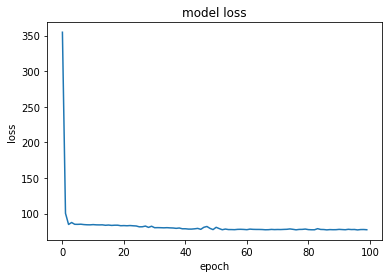

In [ ]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

**5-Evaluation** 
* Keras model can be evaluated with evaluate() function
* Evaluation results are contained in a list

Refer: https://keras.io/metrics/

In [ ]:
results = model.evaluate(X_test, y_test)


4/4 [==============================] - 0s 2ms/step - loss: 79.2234 - mse: 79.2234


In [ ]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed


['loss', 'mse']
[79.22337341308594, 79.22337341308594]


In [ ]:
print('loss: ', results[0])
print('mse: ', results[1])

loss:  79.22337341308594
mse:  79.22337341308594


## **Experiments to do:**
|
1.  Change the activation functions for the above model and write down your observations.
2.  Change the epochs ( reduce and increase) for the above model and write down your observations.
3.  Create a MLP model to classify IRIS dataset. Download dataset from here: http://archive.ics.uci.edu/ml/index.php . 

     --> Create MLP models with 1,3,5 hidden layers and give your inferences
4. **Odd Numbers:** Create a sequential model to classify the MNIST dataset: https://keras.io/api/datasets/mnist/ 
     
  **Even Numbers:**  Create a sequential model to classify the CIFAR10 dataset: https://keras.io/api/datasets/cifar10/ : 

   **4.1** USe the following Archetecture and run for 100 epochs:

      Input layer- 50 Neurons

      Hidden 1    - 50 Neurons

      Hidden 2    - 50 Neurons

      Output
    
  **4.2** Add more hidden layers and execute for different epochs and note down your inferences.


